**Air Pollution In India**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [2]:
data=pd.read_csv('../input/data.csv',encoding = "ISO-8859-1")
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [4]:
replacements = {
   'state': {
      r'Uttaranchal': 'Uttarakhand', 
   }
}

data.replace(replacements, regex=True, inplace=True)

**TOP 10**

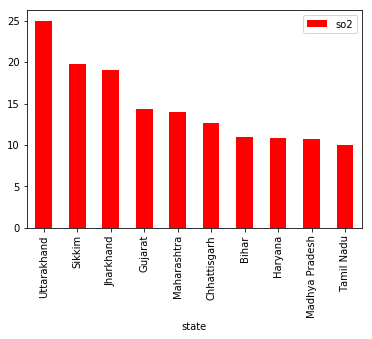

In [5]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).head(10).plot.bar(color='r')
plt.show()

**BOTTOM 10**

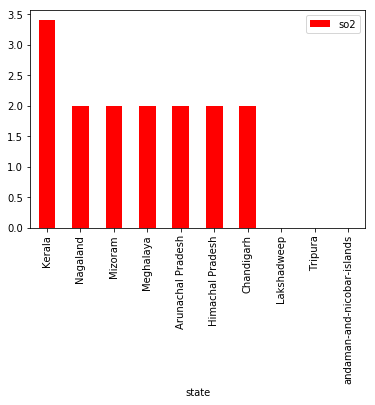

In [6]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).tail(10).plot.bar(color='r')
plt.show()

**TOP 10**

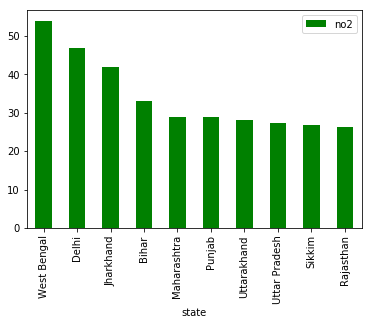

In [7]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(10).plot.bar(color='g')
plt.show()

**BOTTOM 10**

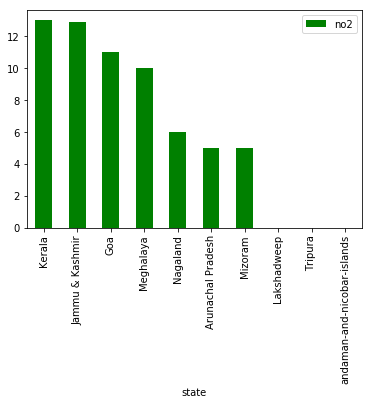

In [8]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).tail(10).plot.bar(color='g')
plt.show()

**TOP 10**

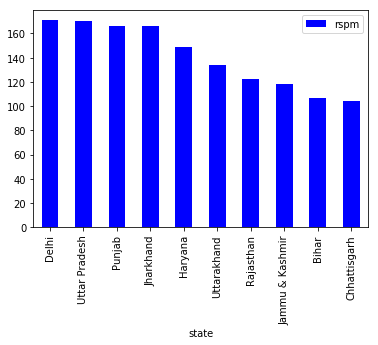

In [9]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).head(10).plot.bar(color='b')
plt.show()

**BOTTOM 10**

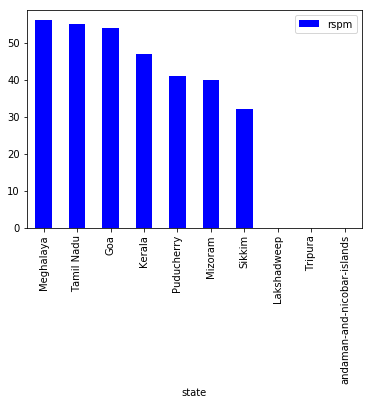

In [10]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).tail(10).plot.bar(color='b')
plt.show()

**TOP 10**

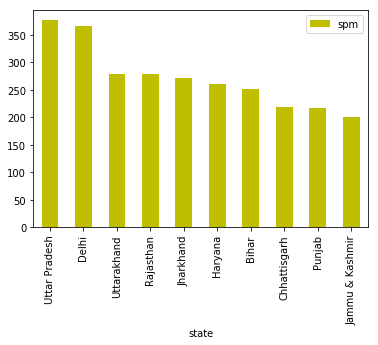

In [11]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).head(10).plot.bar(color='y')
plt.show()

**BOTTAM 10**

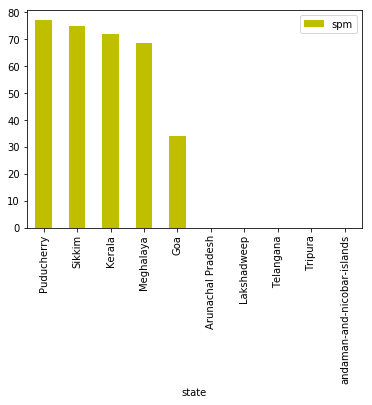

In [12]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).tail(10).plot.bar(color='y')
plt.show()

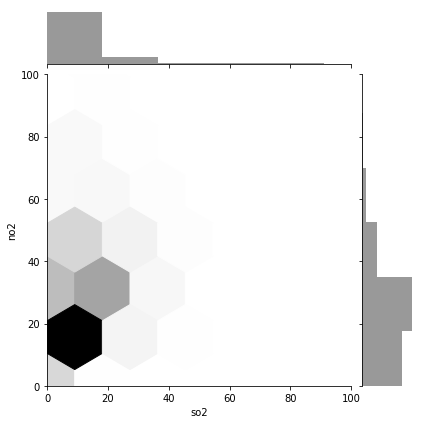

In [13]:
#Exploring relationship between proportion of Sulphur dioxide & Nitrogen dioxide
#sns.lmplot(x='so2',y='no2',data=data)
sns.jointplot(x='so2', y='no2', data=data,kind='hex',color='k',xlim={0,100}, ylim={0,100})

In [14]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

**SO2 Analysis**

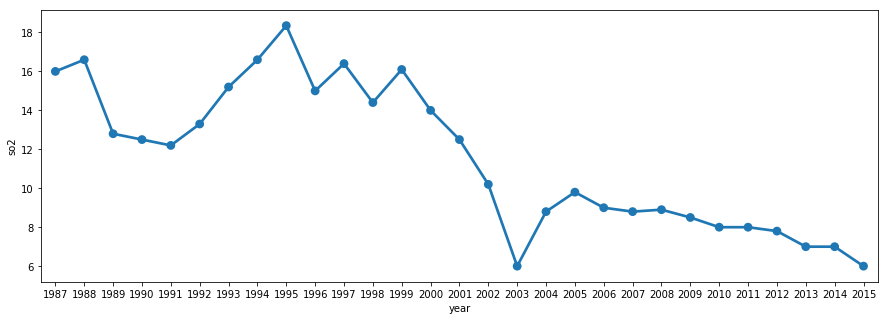

In [15]:
df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='so2', data=df)

****NO2 Analysis**

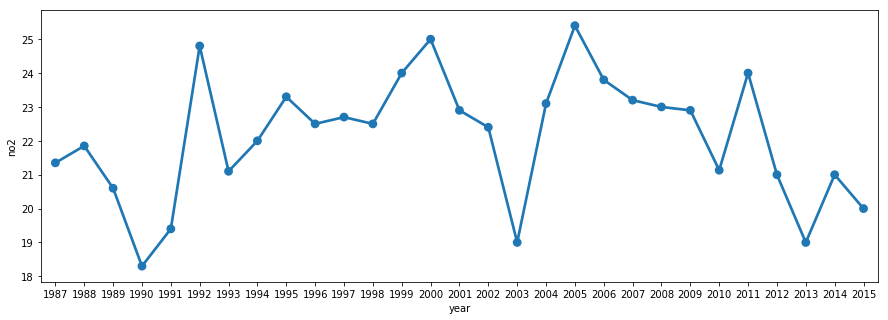

In [17]:
df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='no2', data=df)